In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class NeuralNetwork_Backpropagation:
    """
    A neural network with 1 - S - 1 architecture
    Default: Sigmoid function in Hidden Layer and Linear function in output layer
    """
    def __init__(self,neurons,seed=6202):
        self.neurons = neurons
        self.seed = seed
        self.a = np.array([])
        self.t_plot = np.array([])
        self.epoch_error = np.array([])
        np.random.seed(self.seed)
        self.w1 = np.random.uniform(low=-0.5,high=0.5,size=(self.neurons,1))
        self.b1 = np.random.uniform(-0.5,0.5,(self.neurons,1))
        self.w2 = np.random.uniform(-0.5,0.5,(1,self.neurons))
        self.b2 = np.random.uniform(-0.5,0.5,(1,1))

    def sigmoid(self,x):
        sample = []
        for i in range(len(x)):
            sample.append(1 / (1 + np.exp(-x[i])))
        final = np.array(sample).reshape(len(x), 1)
        return final

    def stochastic_train(self,train_data,target,learning_rate=0.1,epochs=1000):
        alpha = learning_rate
        epochs = epochs
        self.a = np.array([])
        self.t_plot = np.array([])
        self.epoch_error = np.array([])
        for epochs in range(epochs):
            error = np.array([])
            zipped = list(zip(train_data,target))
            np.random.shuffle(zipped)
            input, output = zip(*zipped)
            for p,t in zip(input,output):
                n1 = np.dot(self.w1, p) + self.b1
                a1 = self.sigmoid(n1)
                a2 = np.dot(self.w2, a1) + self.b2
                self.a = np.append(self.a,a2)
                self.t_plot = np.append(self.t_plot,t)
                error = np.append(error,(t-a2))
                S2 = -2 * error[-1]
                temp = [element for row in a1 for element in row]
                temp1 = [i*(1-i) for i in temp]
                fn1 = np.diag(temp1)
                S1 = np.dot(fn1,self.w2.T)*S2
                self.w2 = self.w2 - alpha*np.dot(S2,a1.T)
                self.b2 = self.b2 - alpha*S2
                self.w1 = self.w1 - alpha*np.dot(S1,p)
                self.b1 = self.b1 - alpha*S1
            self.epoch_error = np.append(self.epoch_error,np.sum(error**2))

    def batch_train(self,train_data,target,learning_rate=0.1,epochs=1000,batch_size = None):
        np.random.seed(self.seed)
        if batch_size == None:
            batch_size = len(train_data)
        alpha = learning_rate
        epochs = epochs
        self.a = np.array([])
        self.t_plot = np.array([])
        self.epoch_error = np.array([])
        for epochs in range(epochs):
            error = np.array([])
            zipped = list(zip(train_data,target))
            np.random.shuffle(zipped)
            batches = []
            for i in range(0,len(train_data),batch_size):
                batches.append(zipped[i:i+batch_size])
            for j in range(len(batches)):
                input, output = zip(*batches[j])
                grad_w1 = np.zeros(self.w1.shape)
                grad_w2 = np.zeros(self.w2.shape)
                grad_b1 = np.zeros(self.b1.shape)
                grad_b2 = np.zeros(self.b2.shape)
                for p,t in zip(input,output):
                    n1 = np.dot(self.w1, p) + self.b1
                    a1 = self.sigmoid(n1)
                    a2 = np.dot(self.w2, a1) + self.b2
                    self.a = np.append(self.a,a2)
                    self.t_plot = np.append(self.t_plot,t)
                    error = np.append(error,(t-a2))
                    S2 = -2 * error[-1]
                    temp = [element for row in a1 for element in row]
                    temp1 = [i*(1-i) for i in temp]
                    fn1 = np.diag(temp1)
                    S1 = np.dot(fn1,self.w2.T)*S2
                    grad_w2 = grad_w2 + np.dot(S2,a1.T)
                    grad_w1 = grad_w1 + np.dot(S1,p)
                    grad_b1 = grad_b1 + S1
                    grad_b2 = grad_b2 + S2
                self.w2 = self.w2 - alpha*(grad_w2/len(batches[j]))
                self.b2 = self.b2 - alpha*(grad_b2/len(batches[j]))
                self.w1 = self.w1 - alpha*(grad_w1/len(batches[j]))
                self.b1 = self.b1 - alpha*(grad_b1/len(batches[j]))
            self.epoch_error = np.append(self.epoch_error,np.sum(error**2))

    def prediction(self,input):
        output = np.array([])
        for i in input:
            n1 = np.dot(self.w1, i) + self.b1
            a1 = self.sigmoid(n1)
            a2 = np.dot(self.w2, a1) + self.b2
            output = np.append(output,a2)
        return output

    def SSE_Epoch(self):
        x_tick = np.arange(0, len(self.epoch_error))
        series = pd.Series(self.epoch_error, index=x_tick)
        fig, ax = plt.subplots(figsize=(16,8))
        ax.plot(x_tick, series, label='Sum Squared Error')
        ax.set_title("SSE Error Plot")
        ax.set_xlabel("Log Scale for SSE Error")
        ax.set_ylabel("Log Scale for Epochs")
        plt.xscale("log")
        plt.yscale("log")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    def NetworkOutput_Vs_Targets(self):
        x_tick = np.arange(len(self.t_plot)-100, len(self.t_plot))
        x_tick1 = np.arange(100)
        series1 = pd.Series(self.a[-100:], index=x_tick)
        series2 = pd.Series(self.t_plot[-100:], index=x_tick)
        series3 = pd.Series(self.a[:100], index=x_tick)
        series4 = pd.Series(self.t_plot[:100], index=x_tick)
        fig, ax = plt.subplots(2,1,figsize=(16,8))
        ax[0].plot(x_tick1, series3, label='Network Outputs')
        ax[0].plot(x_tick1, series4, label='Actual Targets')
        ax[0].set_title("Network Output vs Targets - First 100 Samples")
        ax[0].set_xlabel("Sample Count")
        ax[0].set_ylabel("Outputs")
        ax[0].grid()
        ax[0].legend()
        ax[1].plot(x_tick, series1, label='Network Outputs')
        ax[1].plot(x_tick, series2, label='Actual Targets')
        ax[1].set_title("Network Output vs Targets - Last 100 Samples")
        ax[1].set_xlabel("Sample Count")
        ax[1].set_ylabel("Outputs")
        ax[1].grid()
        ax[1].legend()
        plt.tight_layout()
        plt.show()

    def NN_Function_Approximation(self,p,g):
        a = self.prediction(p)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.plot(pd.Series(g), label="Actual Function")
        ax.plot(pd.Series(a), label="Function Approximation")
        plt.legend()
        plt.grid()
        plt.show()

In [3]:
# Generating a synthetic function
p = np.linspace(-2,2,100)
g = np.exp(-np.abs(p))*np.sin(np.pi*p)

In [4]:
# Testing the neural network
network = NeuralNetwork_Backpropagation(10)#50
network.batch_train(p,g,0.095,3000,batch_size=20)#0.05, 0.085; epoch =2000,bsize=25 

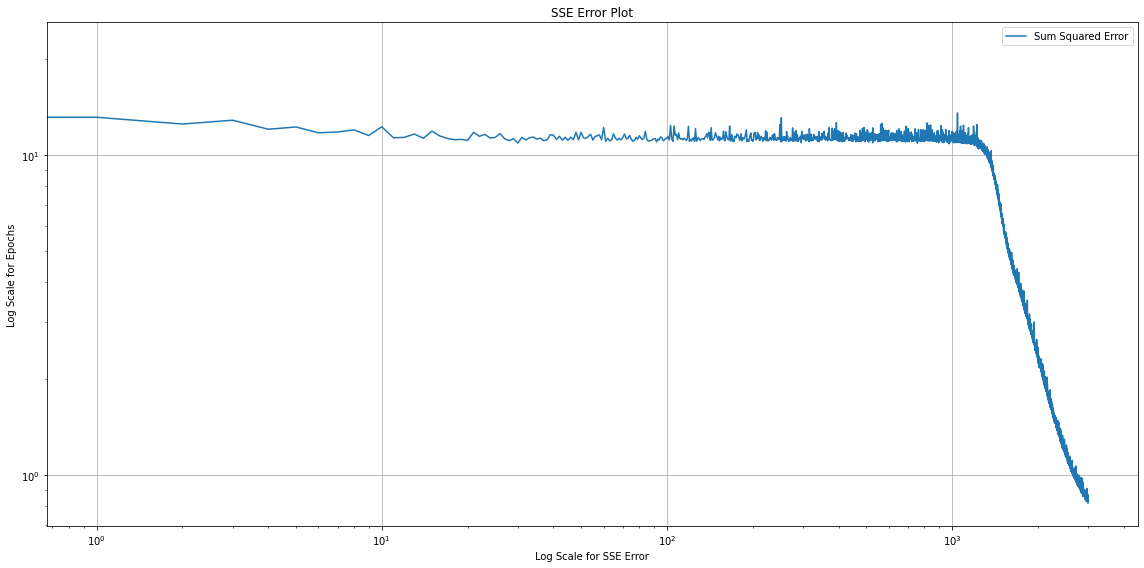

In [5]:
network.SSE_Epoch()

In [6]:
network.prediction(p)

array([ 0.21647847,  0.21416274,  0.21148117,  0.20840119,  0.20488761,
        0.20090235,  0.19640433,  0.19134919,  0.18568916,  0.17937286,
        0.17234508,  0.16454667,  0.15591439,  0.14638079,  0.13587423,
        0.12431887,  0.11163486,  0.09773857,  0.08254304,  0.06595871,
        0.04789429,  0.02825816,  0.00696012, -0.01608624, -0.04096041,
       -0.06773086, -0.0964499 , -0.12714688, -0.15981968, -0.19442394,
       -0.23085939, -0.26895298, -0.30843784, -0.34892779, -0.38988667,
       -0.4305926 , -0.47009778, -0.50718593, -0.54033196, -0.56767183,
       -0.58699593, -0.59578522, -0.59131584, -0.57086006, -0.53200518,
       -0.47308916, -0.39370772, -0.29518777, -0.18087006, -0.05603881,
        0.07258728,  0.19773832,  0.31263113,  0.41187173,  0.49199404,
        0.55155863,  0.59088884,  0.61160371,  0.6161078 ,  0.60714708,
        0.58748027,  0.55966916,  0.52596755,  0.48828072,  0.44816959,
        0.40687973,  0.36538158,  0.32441329,  0.28452167,  0.24

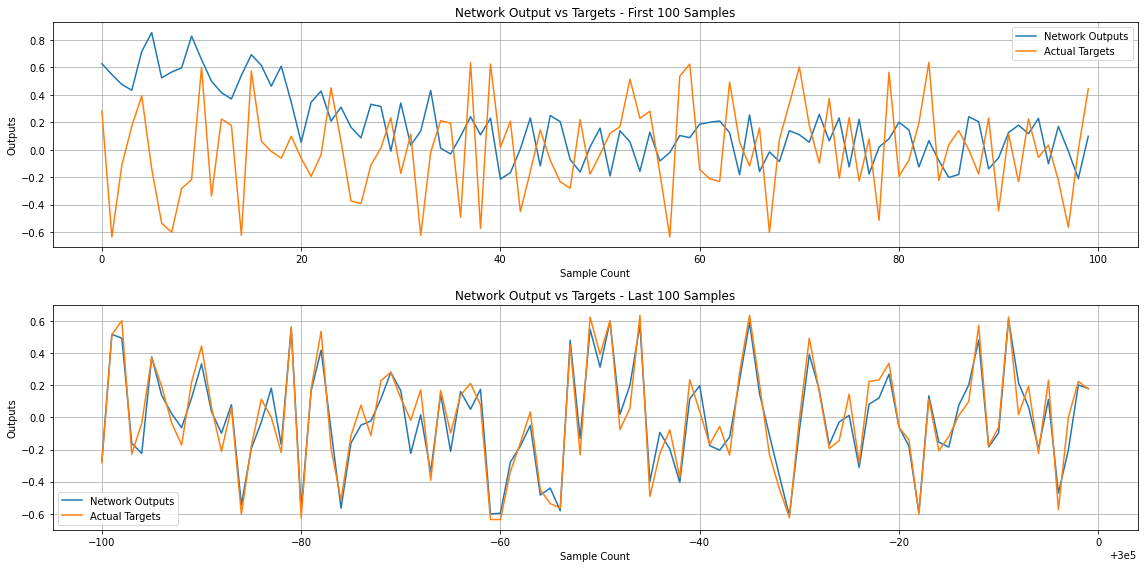

In [7]:
network.NetworkOutput_Vs_Targets()

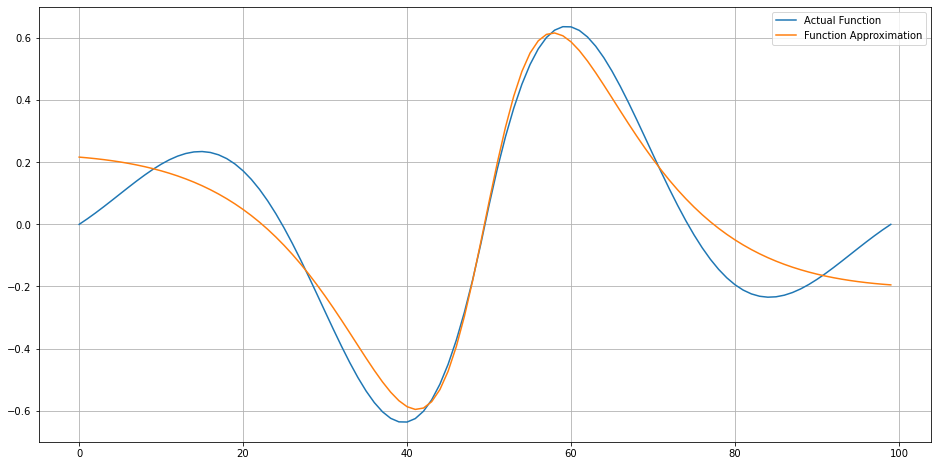

In [8]:
network.NN_Function_Approximation(p,g)